<a href="https://colab.research.google.com/github/KaviyaKannan14/Data-Engineering-ML-projects/blob/main/Spotify_User_Behavior_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/content/Spotify_data.csv')

In [3]:
data.head()

,Age,Gender,spotify_usage_period,spotify_listening_device,spotify_subscription_plan,premium_sub_willingness,preffered_premium_plan,preferred_listening_content,fav_music_genre,music_time_slot,music_Influencial_mood,music_lis_frequency,music_expl_method,music_recc_rating,pod_lis_frequency,fav_pod_genre,preffered_pod_format,pod_host_preference,preffered_pod_duration,pod_variety_satisfaction
0,20-35,Female,More than 2 years,Smart speakers or voice assistants,Free (ad-supported),Yes,Family Plan-Rs 179/month,Podcast,Melody,Night,Sadness or melancholy,leisure time,Playlists,3,Daily,Comedy,Interview,Both,Both,Ok
1,12-20,Male,More than 2 years,Computer or laptop,Free (ad-supported),Yes,Individual Plan- Rs 119/ month,Podcast,Rap,Afternoon,Social gatherings or parties,Workout session,Playlists,2,Several times a week,Comedy,Interview,Both,None,Satisfied
2,35-60,Others,6 months to 1 year,Smart speakers or voice assistants,Free (ad-supported),Yes,Student Plan-Rs 59/month,Podcast,Pop,Night,Relaxation and stress relief,"Study Hours, While Traveling",Playlists,4,Once a week,Sports,Interview,None,Both,Satisfied
3,20-35,Female,1 year to 2 years,"Smartphone, Smart speakers or voice assistants",Free (ad-supported),No,None,Music,Melody,Night,"Relaxation and stress relief, Social gathering...","Office hours, Workout session, leisure time","recommendations, Playlists",4,Never,None,None,None,None,Ok
4,20-35,Female,1 year to 2 years,Smartphone,Free (ad-supported),No,None,Music,Melody,Night,Relaxation and stress relief,leisure time,"recommendations, Playlists",4,Rarely,Lifestyle and Health,Story telling,Well known individuals,Both,Ok


In [4]:
# Adjusting the list of categorical columns according to the provided dataset
categorical_columns_corrected = [
    'Gender', 'spotify_usage_period', 'spotify_listening_device',
    'spotify_subscription_plan', 'premium_sub_willingness',
    'preffered_premium_plan', 'preferred_listening_content',
    'fav_music_genre', 'music_time_slot', 'music_influential_mood',
    'music_lis_frequency', 'music_expl_method', 'pod_lis_frequency',
    'fav_pod_genre', 'preffered_pod_format', 'pod_host_preference',
    'preffered_pod_duration', 'spotify_data'
]



{'music_influential_mood', 'spotify_data'}

In [16]:
actual_columns = data.columns.tolist()

#Filter data
categorical_columns_to_convert = [col for col in categorical_columns_corrected if col in actual_columns]

#Data Conversion
for col in categorical_columns_to_convert:
    data[col] = data[col].astype('category')

#Missing Columns
missing_categorical_columns = set(categorical_columns_corrected) - set(categorical_columns_to_convert)
missing_categorical_columns

{'music_influential_mood', 'spotify_data'}

In [17]:
# Impute missing values for categorical columns with the mode
for col in categorical_columns_to_convert:
    if data[col].isnull().any():
        data[col].fillna(data[col].mode()[0], inplace=True)

# Impute missing values for numerical columns with the median
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
for col in numerical_columns:
    if data[col].isnull().any():
        data[col].fillna(data[col].median(), inplace=True)


data.head()


,Age,Gender,spotify_usage_period,spotify_listening_device,spotify_subscription_plan,premium_sub_willingness,preffered_premium_plan,preferred_listening_content,fav_music_genre,music_time_slot,music_Influencial_mood,music_lis_frequency,music_expl_method,music_recc_rating,pod_lis_frequency,fav_pod_genre,preffered_pod_format,pod_host_preference,preffered_pod_duration,pod_variety_satisfaction
0,20-35,Female,More than 2 years,Smart speakers or voice assistants,Free (ad-supported),Yes,Family Plan-Rs 179/month,Podcast,Melody,Night,Sadness or melancholy,leisure time,Playlists,3,Daily,Comedy,Interview,Both,Both,Ok
1,12-20,Male,More than 2 years,Computer or laptop,Free (ad-supported),Yes,Individual Plan- Rs 119/ month,Podcast,Rap,Afternoon,Social gatherings or parties,Workout session,Playlists,2,Several times a week,Comedy,Interview,Both,None,Satisfied
2,35-60,Others,6 months to 1 year,Smart speakers or voice assistants,Free (ad-supported),Yes,Student Plan-Rs 59/month,Podcast,Pop,Night,Relaxation and stress relief,"Study Hours, While Traveling",Playlists,4,Once a week,Sports,Interview,None,Both,Satisfied
3,20-35,Female,1 year to 2 years,"Smartphone, Smart speakers or voice assistants",Free (ad-supported),No,None,Music,Melody,Night,"Relaxation and stress relief, Social gathering...","Office hours, Workout session, leisure time","recommendations, Playlists",4,Never,None,None,None,None,Ok
4,20-35,Female,1 year to 2 years,Smartphone,Free (ad-supported),No,None,Music,Melody,Night,Relaxation and stress relief,leisure time,"recommendations, Playlists",4,Rarely,Lifestyle and Health,Story telling,Well known individuals,Both,Ok


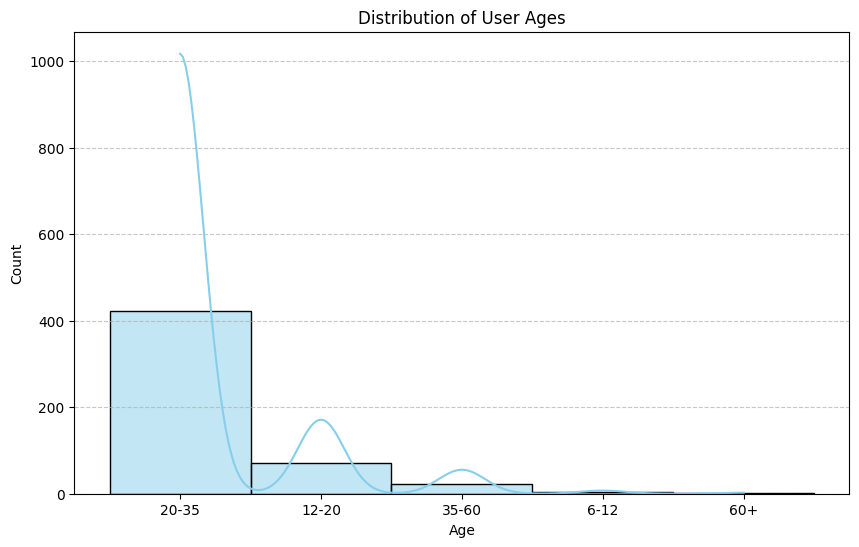

In [6]:
# EDA: User Demographics - Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Age', bins=20, color='skyblue', kde=True)
plt.title('Distribution of User Ages')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


<ipython-input-7-541e3a40981a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Gender', palette='pastel')


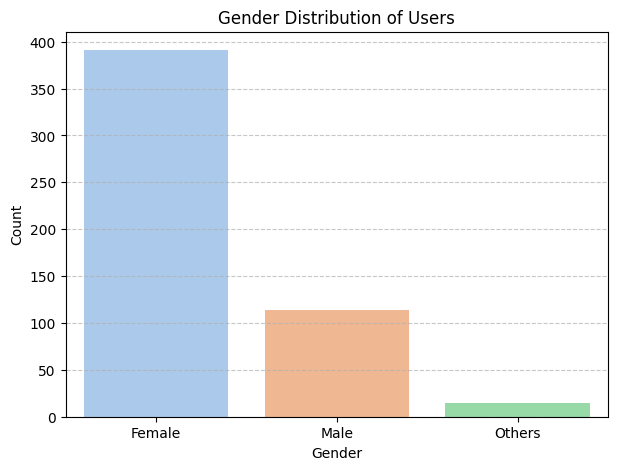

In [7]:
# EDA: User Demographics - Gender Breakdown
plt.figure(figsize=(7, 5))
sns.countplot(data=data, x='Gender', palette='pastel')
plt.title('Gender Distribution of Users')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<ipython-input-8-a2bfe597a9a7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, y='fav_music_genre', order=data['fav_music_genre'].value_counts().index, palette='Set2')


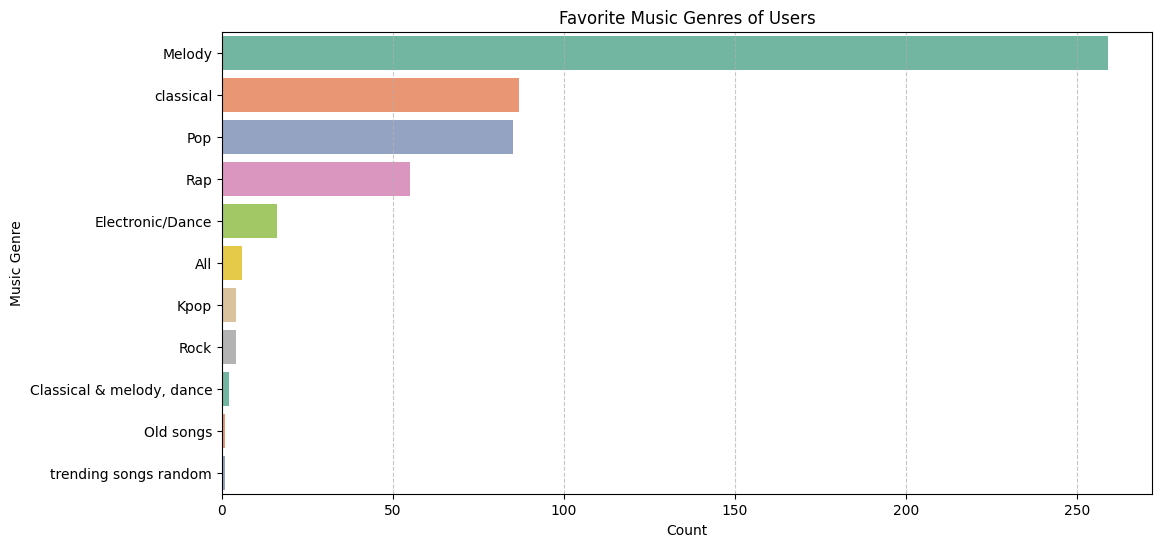

In [8]:
# EDA: User Preferences - Favorite Music Genre
plt.figure(figsize=(12, 6))
sns.countplot(data=data, y='fav_music_genre', order=data['fav_music_genre'].value_counts().index, palette='Set2')
plt.title('Favorite Music Genres of Users')
plt.xlabel('Count')
plt.ylabel('Music Genre')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

<ipython-input-9-d691c5cca9d7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='spotify_subscription_plan', palette='coolwarm')


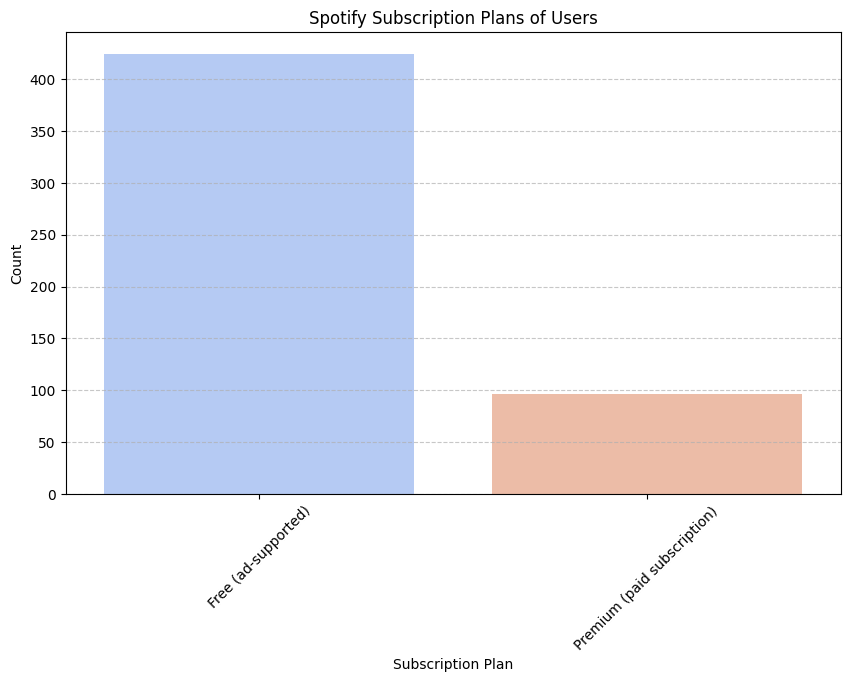

In [9]:
# EDA: User Preferences - Spotify Subscription Plan
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='spotify_subscription_plan', palette='coolwarm')
plt.title('Spotify Subscription Plans of Users')
plt.xlabel('Subscription Plan')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<ipython-input-11-e4e2eeb0b510>:15: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


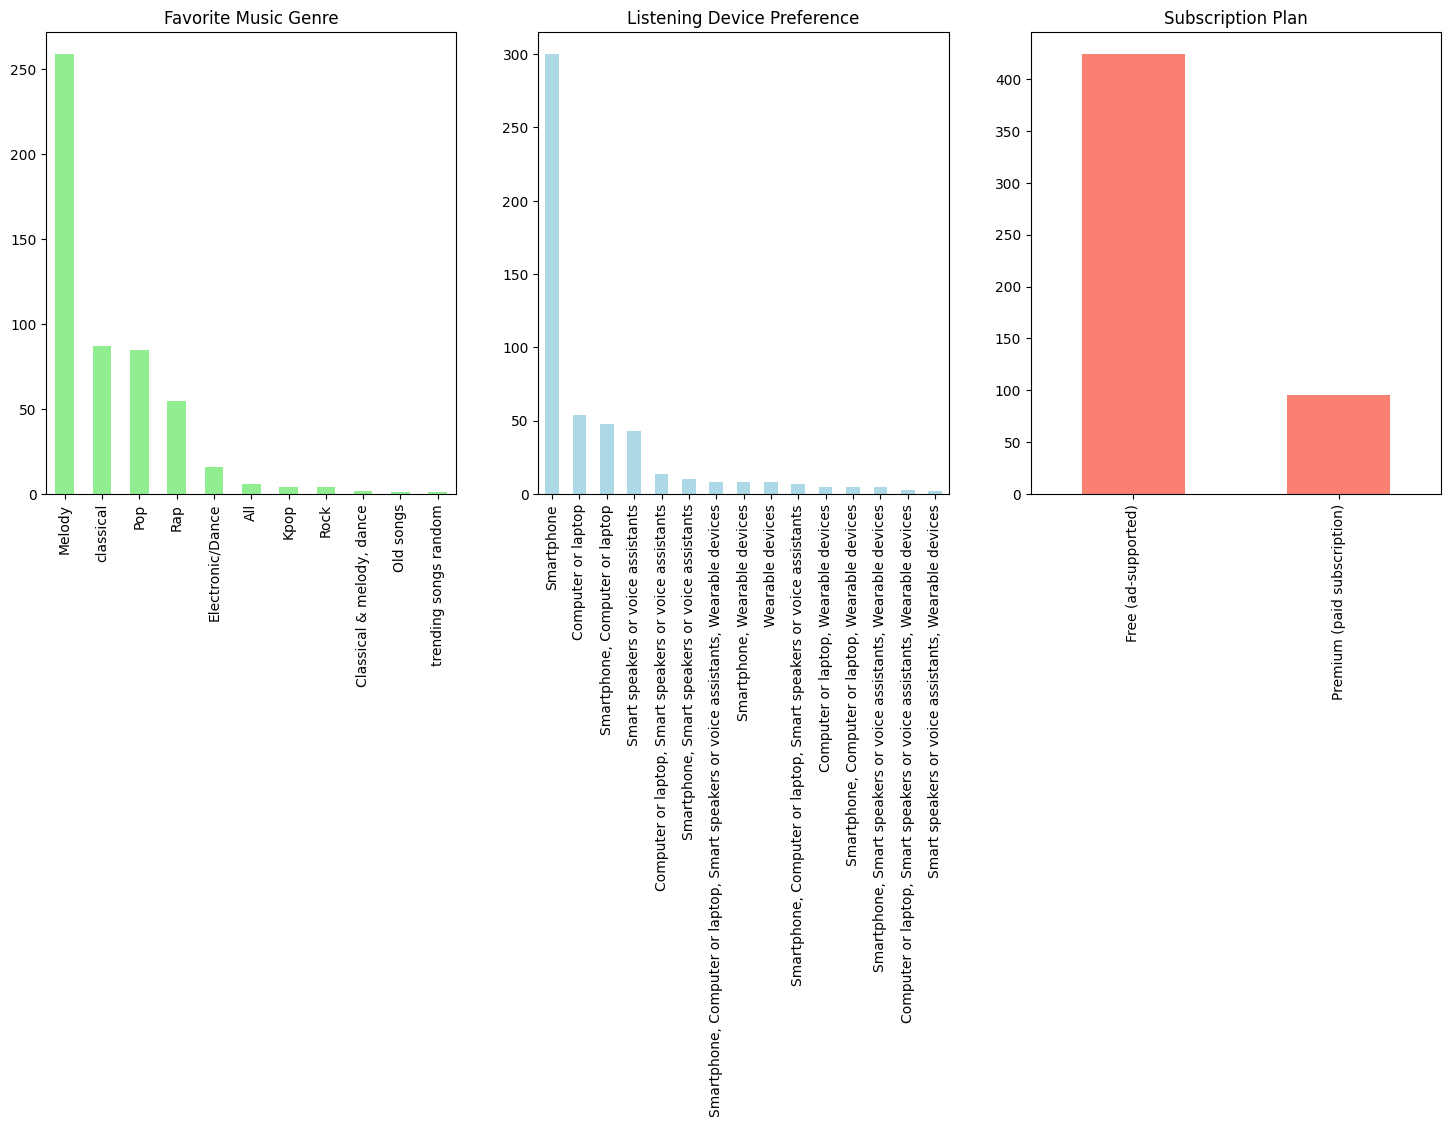

In [11]:
# Analysis on user preferences (Music Genre, Listening Device, Subscription Plan)
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
data['fav_music_genre'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Favorite Music Genre')

plt.subplot(1, 3, 2)
data['spotify_listening_device'].value_counts().plot(kind='bar', color='lightblue')
plt.title('Listening Device Preference')

plt.subplot(1, 3, 3)
data['spotify_subscription_plan'].value_counts().plot(kind='bar', color='salmon')
plt.title('Subscription Plan')

plt.tight_layout()
plt.show()

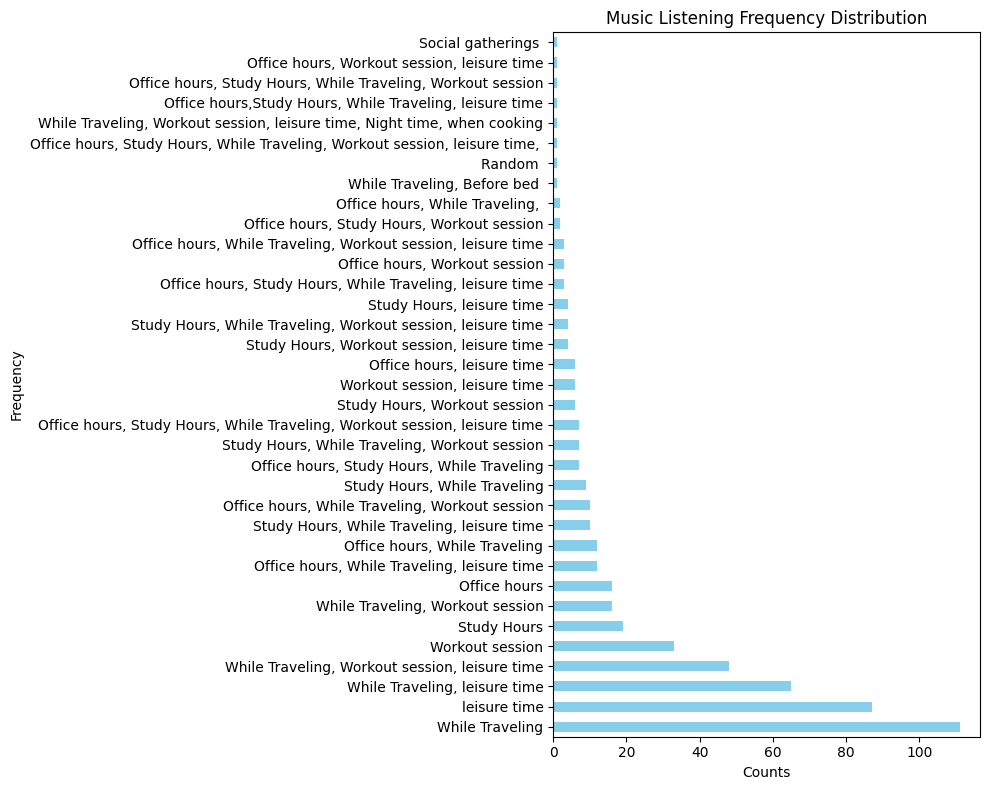

In [15]:
# User engagement analysis (Listening Frequency)
music_lis_freq_counts = data['music_lis_frequency'].value_counts()

plt.figure(figsize=(10, 8))
music_lis_freq_counts.plot(kind='barh', color='skyblue')  # Horizontal bar plot for better readability
plt.title('Music Listening Frequency Distribution')
plt.xlabel('Counts')
plt.ylabel('Frequency')
plt.tight_layout()  # Adjust the layout
plt.show()




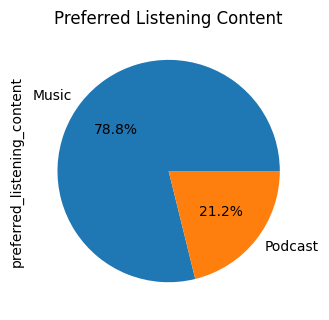

In [14]:
# User engagement analysis(Preferred Content)
plt.subplot(1, 2, 2)
data['preferred_listening_content'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Preferred Listening Content')

plt.tight_layout()
plt.show()